## Assignment 9: Exploring Neural Networks for Regression

### Stefenie Pickston
#### 1506427

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


#### Loading the Data.

In [8]:
# Load Data
df = pd.read_csv(os.path.join(dirname, filename))

In [9]:
# Check
print("Dataset loaded...")
df.info()
df.head()

Dataset loaded...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  f

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Preparing the full data for regression algorithms. 

In [10]:
# Replace all NULL (missing) values
df = df.fillna(0)

# OneHot Encoding for Categorical to Numerical is not needed

# Split into x and y
X = df.drop(columns = ['id', 'date','price'])
y = df['price']

# 60% train. 20% validation. 20% test. 
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=1506427)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=1506427)

# Check
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# only fit on train data to prevent the different means/standard deviations from skewing any data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

(12967, 18) (4323, 18) (4323, 18) (12967,) (4323,) (4323,)


#### Neural Network...

2022-10-09 05:40:44.096597: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
406/406 [==============================] - 4s 5ms/step - loss: 533081.5000 - mean_absolute_error: 533081.5000 - val_loss: 516129.5312 - val_mean_absolute_error: 516129.5312
Epoch 2/30
406/406 [==============================] - 2s 4ms/step - loss: 445392.3750 - mean_absolute_error: 445392.3750 - val_loss: 357320.6875 - val_mean_absolute_error: 357320.6875
Epoch 3/30
406/406 [==============================] - 2s 4ms/step - loss: 282085.5000 - mean_absolute_error: 282085.5000 - val_loss: 235001.8281 - val_mean_absolute_error: 235001.8281
Epoch 4/30
406/406 [==============================] - 2s 4ms/step - loss: 218500.0312 - mean_absolute_error: 218500.0312 - val_loss: 203497.7031 - val_mean_absolute_error: 203497.7031
Epoch 5/30
406/406 [==============================] - 2s 4ms/step - loss: 191062.0000 - mean_absolute_error: 191062.0000 - val_loss: 179673.0469 - val_mean_absolute_error: 179673.0469
Epoch 6/30
406/406 [==============================] - 1s 3ms/step - loss: 169841

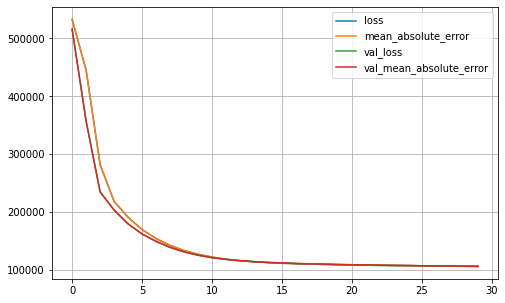

In [11]:
#set GPU to ON: K -> Settings Accelerator -> GPU
#Sequential NN
#Optimizer: adam
#Loss Function: mae
#Epochs: 30 (exact)

import tensorflow as tf
from tensorflow import keras

# setting the seed
tf.random.set_seed(1506427)

model = keras.models.Sequential()
# this is 2 layers
model.add(keras.layers.Dense(300, activation="relu")) # 300 is size of the layer
model.add(keras.layers.Dense(100, activation="relu")) # each line here is a layer
model.add(keras.layers.Dense(1)) # only need one layer due to regression

model.compile(loss = "mean_absolute_error", optimizer = "adam", metrics = ["mean_absolute_error"])
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val))

model.summary()

# plot graph
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

#print(history.history['val_loss'])

In [12]:
# numbers of hidden layers [1,2,4,8]
# sizes of different layers [10, 30, 100]
# Select the network architecture (combination of number of layers and layer size) that produces the smallest MAE on the validation set.

num = [1,2,4,8]
size = [10,30,100]
best_size = [0,0]
best_val_loss = np.inf
best_model = model

# for each j in size
for j in size:
    # for each i in num
    for i in num:
        model = keras.models.Sequential()
        for k in range(i):
            # create i many layers of j size
            model.add(keras.layers.Dense(j, activation="relu")) # is this correct?
        # final dense size 1 layer
        model.add(keras.layers.Dense(1))
        # compile and run
        model.compile(loss = "mean_absolute_error", optimizer = "adam", metrics = ["mean_absolute_error"])
        history = model.fit(X_train_scaled, y_train, epochs=30, verbose=0, validation_data=(X_val_scaled, y_val))

        if history.history['val_loss'][-1] < best_val_loss:
            # found a better model/size
            best_val_loss = history.history['val_loss'][-1]
            best_size = [i,j]
            best_model = model
            print("Better Model Found!")

        model.summary()

print(best_size)

Better Model Found!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                190       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Better Model Found!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                190       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11   

Running the best test set

Epoch 1/30
406/406 [==============================] - 2s 3ms/step - loss: 188882.1719 - mean_absolute_error: 188882.1719 - val_loss: 109423.4297 - val_mean_absolute_error: 109423.4297
Epoch 2/30
406/406 [==============================] - 1s 4ms/step - loss: 109388.6562 - mean_absolute_error: 109388.6562 - val_loss: 105223.0703 - val_mean_absolute_error: 105223.0703
Epoch 3/30
406/406 [==============================] - 1s 3ms/step - loss: 104942.3203 - mean_absolute_error: 104942.3203 - val_loss: 100530.1172 - val_mean_absolute_error: 100530.1172
Epoch 4/30
406/406 [==============================] - 1s 4ms/step - loss: 99613.9219 - mean_absolute_error: 99613.9219 - val_loss: 98851.1875 - val_mean_absolute_error: 98851.1875
Epoch 5/30
406/406 [==============================] - 1s 3ms/step - loss: 95107.5469 - mean_absolute_error: 95107.5469 - val_loss: 94661.9375 - val_mean_absolute_error: 94661.9375
Epoch 6/30
406/406 [==============================] - 1s 3ms/step - loss: 91450.6719 - m

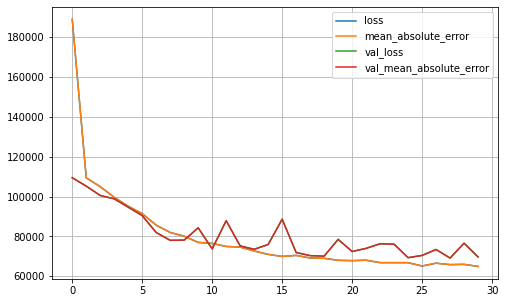

In [20]:
# [8,100] is the best values
# Test run for these values

# setting the seed
tf.random.set_seed(1506427)

model = keras.models.Sequential()
# this is 8 layers
model.add(keras.layers.Dense(100, activation="relu")) # 100 is size of the layer
model.add(keras.layers.Dense(100, activation="relu")) # each line here is a layer
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1)) # only need one layer due to regression

model.compile(loss = "mean_absolute_error", optimizer = "adam", metrics = ["mean_absolute_error"])
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val))

model.summary()

# plot graph
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Note that the learning rate is a little high in the graph above.

Use the best network to predict the test set. 

Produce a scatter plot for the predictions over the test set.

136/136 [==============================] - 0s 2ms/step - loss: 71433.3203 - mean_absolute_error: 71433.3203


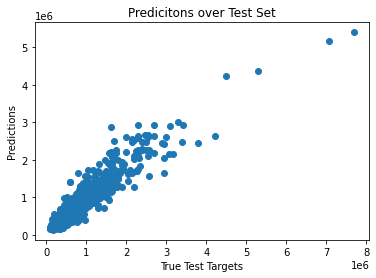

In [21]:
# setting the seed
tf.random.set_seed(1506427)

#evaluate MAE
mae_test = model.evaluate(X_test_scaled, y_test)
plt.title("Predicitons over Test Set")
y_pred = model.predict(X_test_scaled)

# scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Test Targets")
plt.ylabel("Predictions")
plt.show()

What is the MAE value for the test set?

71433.3203

Looking at this plot, what observation can you make?

We have a diagonal line with the dots close to this line. This is the correlation to predictor and test value. There are few mispredictions, which means that the prediction is working very well.